In [1]:
%matplotlib inline

# Module 8 - Programming Assignment

## Directions

There are general instructions on Blackboard and in the Syllabus for Programming Assignments. This Notebook also has instructions specific to this assignment. Read all the instructions carefully and make sure you understand them. Please ask questions on the discussion boards or email me at `EN605.445@gmail.com` if you do not understand something.

<div style="background: mistyrose; color: firebrick; border: 2px solid darkred; padding: 5px; margin: 10px;">
Please follow the directions and make sure you provide the requested output. Failure to do so may result in a lower grade even if the code is correct or even 0 points.
</div>

You must submit your assignment as `<jhed_id>.ipynb` but DO NOT submit the supplementary files. Thanks!

# The Problem

When we last left our agent in Module 4, it was wandering around a world filled with plains, forests, swamps, hills and mountains. This presupposes a map with known terrain:

```
......
...**.
...***
..^...
..~^..
```

but what if all we know is that we have some area of interest, that we've reduced to a GPS grid:

```
??????
??????
??????
??????
??????
```

and the agent has to determine what kind of terrain is to the left, front and right of it?

Assuming the agent has a very simple visual sensor that constructs a 4x4 grayscale image for each of the three directions, it might it could see something like this:

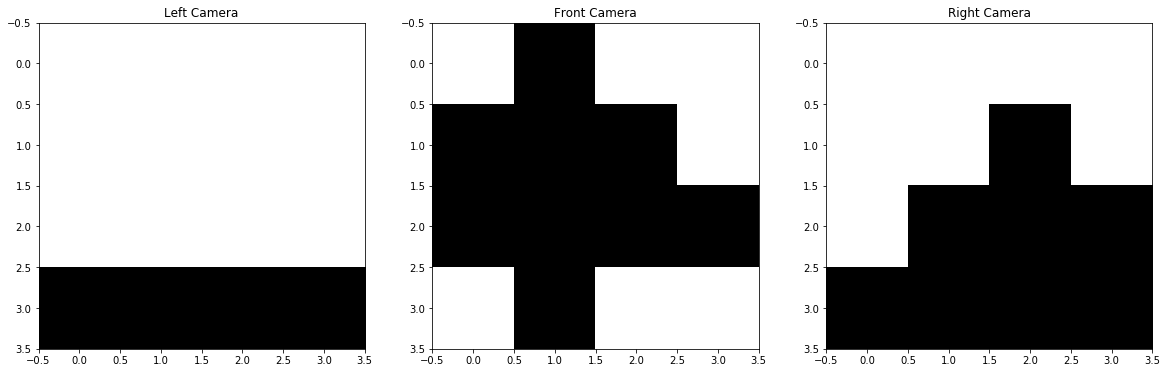

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

plain =  [0.0, 0.0, 0.0, 0.0,0.0, 0.0, 0.0, 0.0,0.0, 0.0, 0.0, 0.0,1.0, 1.0, 1.0, 1.0]
forest = [0.0, 1.0, 0.0, 0.0,1.0, 1.0, 1.0, 0.0,1.0, 1.0, 1.0, 1.0,0.0, 1.0, 0.0, 0.0]
hills =  [0.0, 0.0, 0.0, 0.0,0.0, 0.0, 1.0, 0.0,0.0, 1.0, 1.0, 1.0,1.0, 1.0, 1.0, 1.0]
swamp =  [0.0, 0.0, 0.0, 0.0,0.0, 0.0, 0.0, 0.0,1.0, 0.0, 1.0, 0.0,1.0, 1.0, 1.0, 1.0]

figure = plt.figure(figsize=(20,6))

axes = figure.add_subplot(1, 3, 1)
pixels = np.array([255 - p * 255 for p in plain], dtype='uint8')
pixels = pixels.reshape((4, 4))
axes.set_title( "Left Camera")
axes.imshow(pixels, cmap='gray')

axes = figure.add_subplot(1, 3, 2)
pixels = np.array([255 - p * 255 for p in forest], dtype='uint8')
pixels = pixels.reshape((4, 4))
axes.set_title( "Front Camera")
axes.imshow(pixels, cmap='gray')

axes = figure.add_subplot(1, 3, 3)
pixels = np.array([255 - p * 255 for p in hills], dtype='uint8')
pixels = pixels.reshape((4, 4))
axes.set_title( "Right Camera")
axes.imshow(pixels, cmap='gray')

plt.show()
plt.close()

which would be plains, forest and hills respectively.

## The Assignment

For this programming assignment your tasks are:

1. Write a logistic regression that simply determines if something is a hill or not (two class problem). 
2. You will also evaluate that logistic regression by generating a *confusion matrix*.

For a starting point, you can refer to **module-8-pseudocode.pdf** and the Self-Check.

## Data

We have clean examples of the different types of terrain but based on the location, the registration can be a bit off for some of the types and the visual sensor is often noisy.

Here are the clean examples with different registrations: 

In [3]:
clean_data = {
    "plains": [
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, "plains"]
    ],
    "forest": [
        [0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, "forest"],
        [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, "forest"],
        [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, "forest"],
        [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, "forest"]
    ],
    "hills": [
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, "hills"],
        [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, "hills"],
        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, "hills"],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, "hills"]
    ],
    "swamp": [
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, "swamp"],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, "swamp"]        
    ]
}

Let's create a function that allows us to view any of these:

In [4]:
def view_sensor_image( data):
    figure = plt.figure(figsize=(4,4))
    axes = figure.add_subplot(1, 1, 1)
    pixels = np.array([255 - p * 255 for p in data[:-1]], dtype='uint8')
    pixels = pixels.reshape((4, 4))
    axes.set_title( "Left Camera:" + data[-1])
    axes.imshow(pixels, cmap='gray')
    plt.show()
    plt.close()

"I think that I shall never see a thing so lovely as a tree."

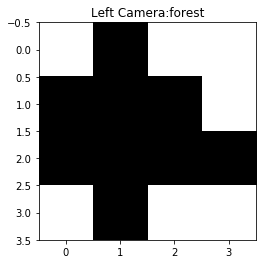

In [5]:
view_sensor_image( clean_data[ "forest"][0])

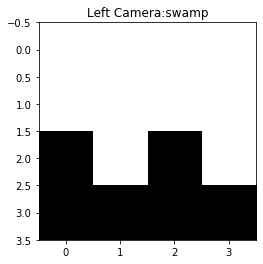

In [6]:
view_sensor_image( clean_data["swamp"][0])

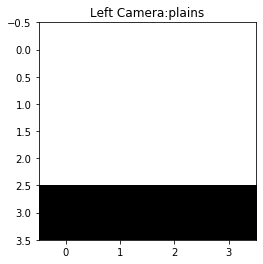

In [7]:
view_sensor_image( clean_data["plains"][0])

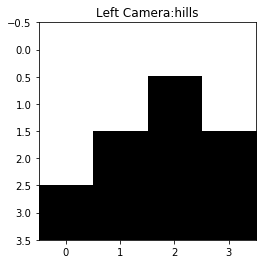

In [8]:
view_sensor_image( clean_data["hills"][0])

The data that comes in, however, is noisy. The values are never exactly 0 and 1. In order to mimic this we need a `blur` function.

We will assume that noise is normally distributed. For values that should be 0, the noisy values are distributed $N(0.10, 0.05)$. For values should be 1, the noisy values are distributed $N(0.9, 0.10)$.

In [9]:
def blur( data):
    def apply_noise( value):
        if value < 0.5:
            v = random.gauss( 0.10, 0.05)
            if v < 0.0:
                return 0.0
            if v > 0.75:
                return 0.75
            return v
        else:
            v = random.gauss( 0.90, 0.10)
            if v < 0.25:
                return 0.25
            if v > 1.00:
                return 1.00
            return v
    noisy_readings = [apply_noise( v) for v in data[0:-1]]
    return noisy_readings + [data[-1]]

We can see how this affects what the agent *actually* sees.

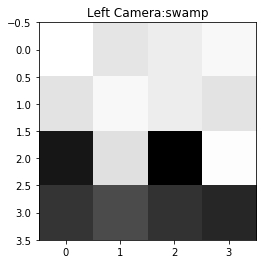

In [10]:
view_sensor_image( blur( clean_data["swamp"][0]))

You are going to want to write four (4) functions:

1. `generate_data`
2. `learn_model`
3. `apply_model`
4. `error_rate`


### `generate_data`

With the clean examples and the `blur` function, we have an unlimited amount of data for training and testing our classifier, a logistic regression that determines if a sensor image is hills (1) or not (0).

In classification, there is a general problem known was the Unbalanced Class Problem (UCP). If your training data has, for example, 90 "in the class" examples and 10 "not in the class" examples then it could achieve 90% accuracy just by guessing "yes". While not all classification algorithms are subject to the problem, the linear algebra-based algorithms (regression, logistic regression, neural networks) are. 

For this project, we can get around UCP because we have an unlimited amount of training and test data. Specifically, our `generate_data` function will generate *balanced* classes of "in the class" and "not in the class" (equal numbers of yes/no, true/false).

Additionally, when you send your data to the actual `learn_model` function, it will need to have all the String labels transformed to 0 or 1 appropriately. Remember, you also need to set $x_0$ = 1.0; *where* you do that is up to you but you need to be consistent (if you do it in `generate_data` then don't also do it in `learn_model` or `apply_model`.

You can make `generate_data` as sophisticated as you like. But it should at least take n and a label so that:

`generate_data( clean_data, 100, "hills")`

generates 100 hills, 100 not hills and has transformed the String labels into 1 and 0, respectively.

### `learn_model`

`learn_model` is the function that takes in training data and actually learns the logistic regression model. If you're up to it, you can implement a vectorized version using Numpy but you might start with the loopy version first.

*In the lecture, I mentioned that you usually should mean normalize your data but you don't need to do that in this case because the data is already on the range 0-1.*

I should also mention that gradient descent is not the usual approach to linear|logistic regression because the error function actually has an *exact* solution. However, in the case of large data sets, the exact solution often fails and in any case, the use of gradient descent will prepare you for neural networks next week.

When verbose is True, you should print out the error so you can see that it is getting smaller. 

When developing your algorithm, you need to watch the error so you'll set verbose=True to start. You should print it out every iteration and make sure it is declining. You'll have to experiment with both epsilon and alpha; and it doesn't hurt to make alpha adaptive (if the error increases, make alpha = alpha / 10).

When you know that your algorithm is working, change your code so that the error is printed out only every 1,000 iterations (it takes a lot of iterations for this problem to converge, depending on your parameter values--start early).

`learn_model` returns the List of Thetas.

### `apply_model`

`apply_model` takes a List of Thetas (the model) and either labeled or unlabeled data. If the data is unlabeled, it will return predictions for each observation as a Tuple of the inferred value (0 or 1) and the actual probability (so something like (1, 0.73) or (0, 0.19).

If the data is labeled, you will return a Tuple of the actual value (0 or 1) and the predicted value (0 or 1). In this case, you return a List of something like [(0, 1), (1, 1), (0, 0), (1, 0)].

### `error_rate`

The `error_rate` takes the results of `apply_model` when labeled=True and prints out the error rate...the number of mistakes over the total number of results.


**As always when working with Lists or Lists of Lists, be very careful when you are modifying these items in place that this is what you intend (and not to be modifying a copy)**

**calc_y_hat**

In [11]:
def calc_y_hat(val):
    """ Calc the value of y_hat

    Args:
        val: the x vals

    Returns: the value of y_hat

    """
    return 1 / (1 + np.exp(-val))

**calculate_error**

In [12]:
def calculate_error(y_hat, y):
    """ Calculate the error as defined in the pseudo-code provided

    Args:
        y_hat: the y_hat values calculated above
        y: the provided y value

    Returns:
        The value of the error
    """
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()




---

Put your helper functions above here.

## Main Functions

Use `generate_data` to generate a balanced set of blurred "hills" and "not-hills" examples to test that the function is working.

In [13]:
def generate_data(clean_data, n, key_label):
    """ Provided generate data function.
    
    A flag had to be added to make sure that 100 "not-hills" were generated instead of 99. 

    Args:
        clean_data: clean data struct above
        n: the number to generate
        key_label: key for our data

    Returns:
        Generated test data

    """
    labels = set(clean_data.keys())
    labels.remove(key_label)

    total_per_label = int(n/len(labels))
    data = []
    # create n "not label" and code as y=0
    one_more=True
    for label in labels:
        for _ in range(total_per_label):
            if(one_more):
                datum = blur(random.choice(clean_data[label]))
                xs = datum[0:-1]
                data.append((xs, 0))
                one_more=False
            datum = blur(random.choice(clean_data[label]))
            xs = datum[0:-1]
            data.append((xs, 0))
    # create n "label" and code as y=1
    for _ in range(n):
        datum = blur(random.choice(clean_data[key_label]))
        xs = datum[0:-1]
        data.append((xs, 1))
    random.shuffle(data)
    return data


results = generate_data( clean_data, 10, "hills")
for result in results:
    print(result)

([0.049343917740093696, 0.08743557832101358, 0.2125262813500885, 0.14249961971155867, 0.11969894501626005, 0.12574661108876226, 0.09071524730713251, 0.0636789050697732, 0.9358151938084216, 0.10521272709554952, 0.9426867377312211, 0.21822919731755053, 0.7690905777217626, 0.8287392559133936, 0.9672118612357307, 0.8547361181481019], 0)
([0.10800279132307322, 0.02122951351647004, 0.12667642716268124, 0.10155877898082835, 0.9428144961390014, 0.05096753687272297, 0.1534704601155809, 0.03417922427659488, 0.7531245989374327, 0.8144945303486304, 0.10587298979902893, 0.05500922714680834, 0.8560959527280809, 1.0, 0.8217502127340375, 0.1320189703364779], 1)
([0.12956494241553157, 0.06344570348321843, 0.04141429114126947, 0.09236137337794782, 0.12555672879088264, 0.8612570494706593, 0.10235658816146316, 0.09840273123223052, 0.7357599292777307, 0.9839122359515107, 1.0, 0.09523004637577465, 0.8692719825671992, 0.7874114096208704, 0.8182502837343114, 1.0], 1)
([0.04808713689439989, 0.09277913249408119

Use `learn_model` to learn a logistic regression model for classifying sensor images as "hills" or "not hills". Use your `generate_data` function to generate a training set of size 100 for "hills". **Set Verbose to True**

In [14]:
def learn_model( data, verbose=False):
    """ Function to create a model of the thetas as defined by the provided pseudocode.

    Args:
        data: The generated data
        verbose: Flag to enable verbose debug info

    Returns:
        A list of thetas
    """
    X, y = zip(*data)
    X = list(X)
    y = np.array(list(y))
    X = np.concatenate((np.ones((len(X), 1)), X), axis=1) # insert x0 into x list
    # init thetas to zero
    thetas = np.zeros(X.shape[1])

    i = 0
    current_error = 1
    previous_error = 0
    while abs(current_error - previous_error) > 0.0000001:
        y_hat = np.dot(X, thetas)
        y_hat = calc_y_hat(y_hat)
        y_hat = np.dot(X.T, (y_hat - y)) / len(y)
        thetas -= 0.1 * y_hat

        y_hat = np.dot(X, thetas)
        y_hat = calc_y_hat(y_hat)
        previous_error = current_error
        current_error = calculate_error(y_hat, y)

        if verbose or i % 1000 == 0:
            print(f'Iteration {i} current error={current_error}')
        i += 1
    return thetas

train_data = generate_data( clean_data, 100, "hills")
model = learn_model( train_data, False)
x, y = zip(*train_data)
test_data = generate_data(clean_data, 100, "hills")
x_test, y_test = zip(*train_data)

Iteration 0 current error=0.6917248561160741
Iteration 1000 current error=0.3540022718427045
Iteration 2000 current error=0.2549242205425106
Iteration 3000 current error=0.2048567492993206
Iteration 4000 current error=0.17419089524565368
Iteration 5000 current error=0.15331485295577718
Iteration 6000 current error=0.13810170397462557
Iteration 7000 current error=0.12647179702868783
Iteration 8000 current error=0.11725936842484476
Iteration 9000 current error=0.1097586548840735
Iteration 10000 current error=0.10351660035821339
Iteration 11000 current error=0.0982286123880791
Iteration 12000 current error=0.09368209623940754
Iteration 13000 current error=0.08972399801570141
Iteration 14000 current error=0.08624121794429788
Iteration 15000 current error=0.08314829968642432
Iteration 16000 current error=0.08037942084072253
Iteration 17000 current error=0.0778830246720445
Iteration 18000 current error=0.07561812787402415
Iteration 19000 current error=0.07355172279563303
Iteration 20000 curr

Use `generate_data` to generate 100 blurred "hills" examples with balanced "non hills" examples and use this as your test data. Set labeled=True. Print out the first 10 results, one per line.

In [15]:
test_data = generate_data( clean_data, 100, "hills")

def apply_model(model, test_data):
    """ Function that applies the model of hills that was learned in "learn_model"

    Args:
        model: The provided model
        test_data: The generated test data

    Returns:
        Returns a model of the hill data
    """
    
    # insert x0 into x list
    test_data = np.concatenate((np.ones((len(test_data), 1)), test_data), axis=1)
    return calc_y_hat(np.dot(test_data, model)).round()

x_test, y_test = zip(*test_data)
results = apply_model( model, list(x_test))
print('First ten results...')
for i in range(10):
    print(f'Predicted:{results[i]} Actual:{y_test[i]}')

First ten results...
Predicted:0.0 Actual:0
Predicted:1.0 Actual:1
Predicted:1.0 Actual:1
Predicted:1.0 Actual:1
Predicted:1.0 Actual:1
Predicted:0.0 Actual:0
Predicted:0.0 Actual:0
Predicted:1.0 Actual:1
Predicted:0.0 Actual:0
Predicted:1.0 Actual:1


Using the results above, print out your error rate (the number of mistakes/total number of examples). There are more sophisticated evaluation techniques that we'll learn in Module 9.

In [16]:
def error_rate(actual, predicted):
    """ Function to print the confusion matrix and error rate for the actual vs predicted

    Args:
        actual: The generated test data of hills and not-hills.
        predicted: The predictions of hills based on our model.
    """
    true_positive = 0
    false_positive = 0
    true_negative = 0
    false_negative = 0
    for i in range(len(y_test)):
        if actual[i] == 1 and int(predicted[i]) == 1:
            true_positive += 1
        elif actual[i] == 0 and int(predicted[i]) == 1:
            false_positive += 1
        elif actual[i] == 0 and int(predicted[i]) == 0:
            true_negative += 1
        elif actual[i] == 1 and int(predicted[i]) == 0:
            false_negative += 1
    print(f'True Positives:{true_positive}')
    print(f'False Positives:{false_positive}')
    print(f'True Negatives:{true_negative}')
    print(f'False Negatives:{false_negative}')
    print(f'Error Rate: {(false_negative + false_positive) / len(y_test)}')
error_rate(y_test, results)

True Positives:99
False Positives:4
True Negatives:96
False Negatives:1
Error Rate: 0.025
